###  Importing of required libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Reading the bitstamp CSV file with Timestamp becoming the index folder & confirm importing via head function

In [2]:
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [3]:
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Repeating same steps for the coinbase CSV file & verified file by displaying head & tail functions.

In [4]:
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
display(coinbase.head(3))
display(coinbase.tail(3))

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Data Preperation

In [6]:
# Determine Data Types
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [7]:
# Understand the baseline statistics
bitstamp.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,580.646391,5.483271e+06,17227.810502


In [8]:
# Determine how many lines are blank
bitstamp.isnull().mean()

Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

In [9]:
#Note: Since data is pretty clean (0.003.6%) we will replace the null lines with the mean
bitstamp = bitstamp.fillna(bitstamp.mean())
bitstamp.isnull().sum()



C:\Users\jonm5\AppData\Local\Temp\ipykernel_836\3420814932.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bitstamp = bitstamp.fillna(bitstamp.mean())


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Remove $ from Close column via str.replace and convert to a float data type

In [10]:
# Remove $ from Close
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp
bitstamp.dtypes

C:\Users\jonm5\AppData\Local\Temp\ipykernel_836\3852807477.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [11]:
# Convert data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Find and remove duplicates

In [12]:
# Identify number of duplicates
bitstamp.duplicated().sum()

472

In [13]:
# Drop duplicates & confirm there are now zero
bitstamp = bitstamp.drop_duplicates()
bitstamp
bitstamp.duplicated().sum()

0

### Repeat aboe steps for the coinbase DataFrame.

In [14]:
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [15]:
coinbase.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


In [16]:
coinbase.isnull().mean()

Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

In [17]:
# Note: Since data is clean (0.0016%) we will replace the null lines with the mean.  This is also consistent with the bitstamp data as well
coinbase = coinbase.fillna(coinbase.mean())
coinbase.isnull().sum()

C:\Users\jonm5\AppData\Local\Temp\ipykernel_836\615995069.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  coinbase = coinbase.fillna(coinbase.mean())


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [18]:
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase
coinbase.dtypes

C:\Users\jonm5\AppData\Local\Temp\ipykernel_836\2312387676.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [19]:
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [20]:
coinbase.duplicated().sum()

217

In [21]:
coinbase = coinbase.drop_duplicates()
coinbase
coinbase.duplicated().sum()

0

## Data Analysis

### Identify columns to use in analysis.  Timestamp as index and close price

In [22]:
# Used iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:,[0, 4]]
bitstamp_sliced
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Open,BTC Volume
Timestamp,,
2018-01-01 00:00:00,13681.04,3.334553
2018-01-01 00:01:00,13646.48,2.663188
2018-01-01 00:02:00,13616.93,0.084653
2018-01-01 00:03:00,13610.27,7.182986
2018-01-01 00:04:00,13635.35,1.069665


In [23]:
# Use iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[0, 4]]
coinbase_sliced

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Open,BTC Volume
Timestamp,,
2018-01-01 00:00:00,13620.00,20.812754
2018-01-01 00:01:00,13607.14,13.474359
2018-01-01 00:02:00,13601.44,11.536360
2018-01-01 00:03:00,13587.31,16.328039
2018-01-01 00:04:00,13550.34,9.955364


### Gather summary statistics and start plotting data

In [24]:
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129068.000000,129068.000000,129068.000000,129067.000000,129068.000000,1.290680e+05,129068.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.900298,2318.920359,2312.322643,2315.976088,21.799853,2.070543e+05,2315.714509
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.987500,8621.657500,8604.445000,8613.370000,1.711895,1.773260e+04,8613.589463
50%,10145.310000,10156.415000,10131.745000,10145.950000,4.994099,5.188055e+04,10144.749893
75%,11444.432500,11453.990000,11431.960000,11444.810000,12.717763,1.313100e+05,11443.790807
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [25]:
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129323.000000,129323.000000,129323.000000,129322.000000,129323.000000,1.293230e+05,129323.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.185694,2317.701428,2316.561637,2317.197419,27.481541,2.667869e+05,2317.158180
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.250000,8613.875000,8603.510000,8609.230000,2.999165,3.071232e+04,8609.147091
50%,10137.500000,10145.920000,10127.890000,10137.440000,7.092601,7.461585e+04,10136.037224
75%,11397.515000,11400.000000,11390.000000,11397.237500,16.954254,1.754525e+05,11396.968282
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Close'}, xlabel='Timestamp'>

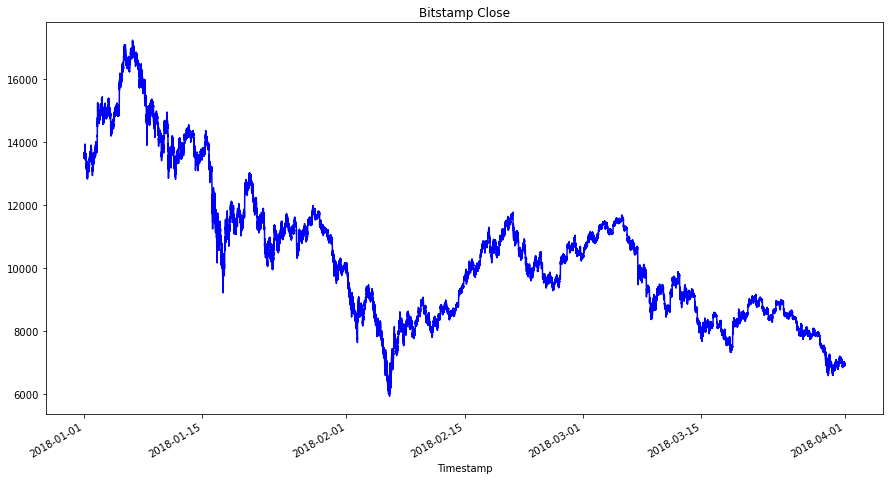

In [26]:
# Line plot for closing price of bitstamp exchange
bitstamp['Close'].plot(figsize=(15,8), title = "Bitstamp Close", color='blue')

<AxesSubplot:title={'center':'Coinbase Close'}, xlabel='Timestamp'>

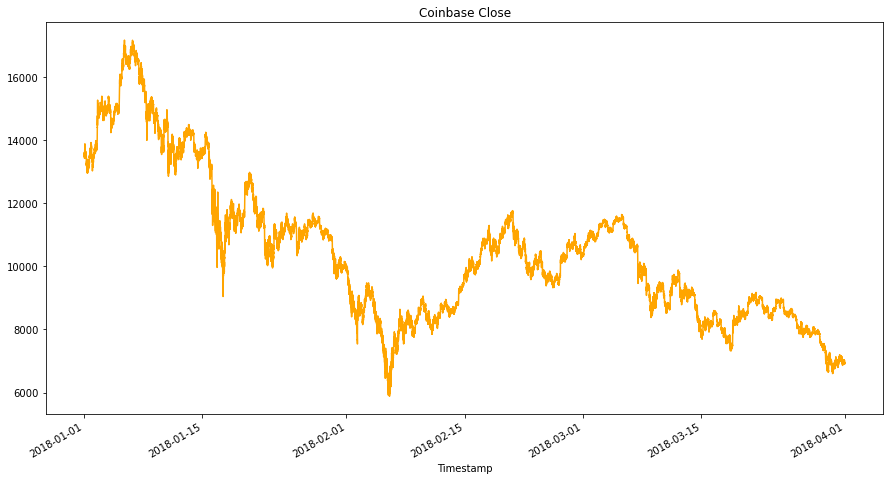

In [27]:
# Line plot for closing price of bitstamp exchange
coinbase['Close'].plot(figsize=(15,8), title = "Coinbase Close", color='orange')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price'}, xlabel='Timestamp'>

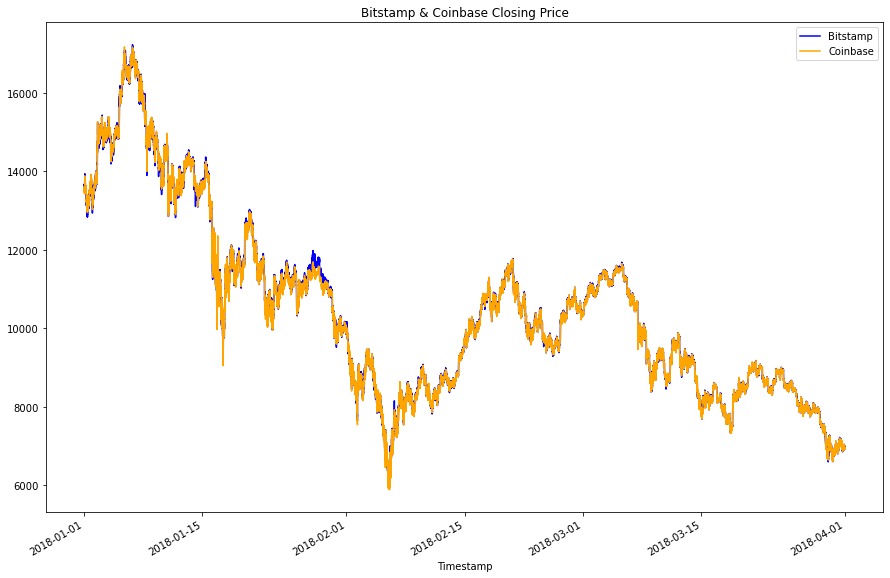

In [28]:
# overlay of the bitstamp and coinbase closing price for 1 Jan - 31 Mar 2018
bitstamp['Close'].plot(legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price', color='blue', label='Bitstamp')
coinbase['Close'].plot(legend=True, figsize=(15,10), color='orange', label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (Jan 2018)'}, xlabel='Timestamp'>

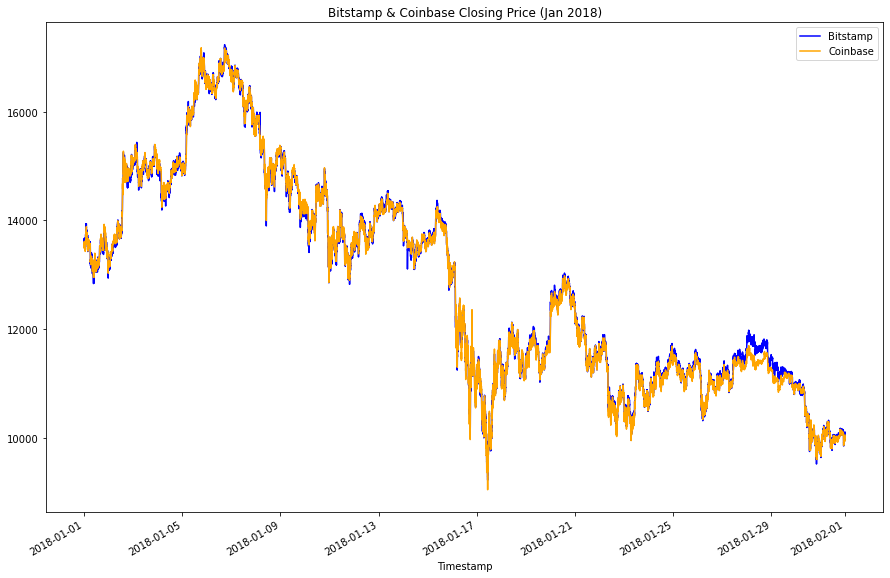

In [29]:
# Breaking down the month of January closing prices for bitstamp and coinbase
bitstamp['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (Jan 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (February 2018)'}, xlabel='Timestamp'>

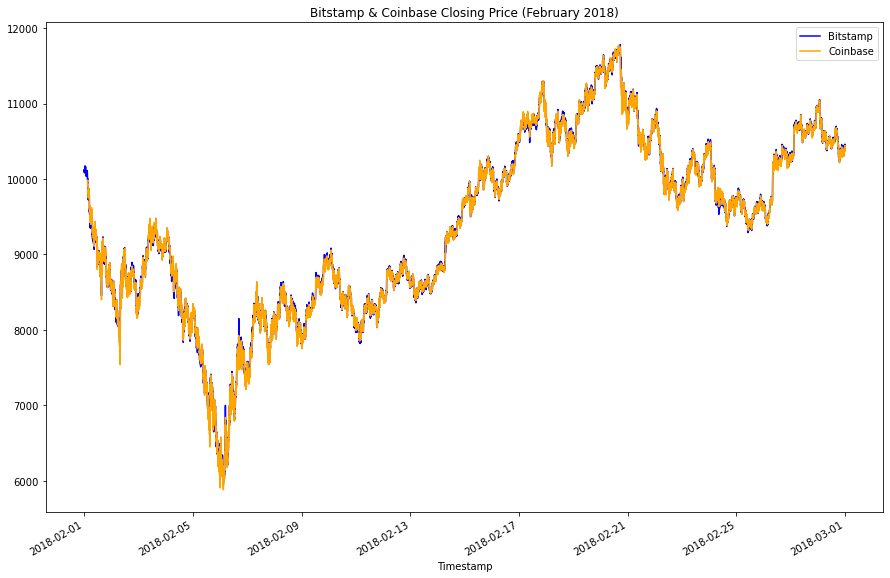

In [30]:
# Breaking down the month of February closing prices for bitstamp and coinbase
bitstamp['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (February 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (March 2018)'}, xlabel='Timestamp'>

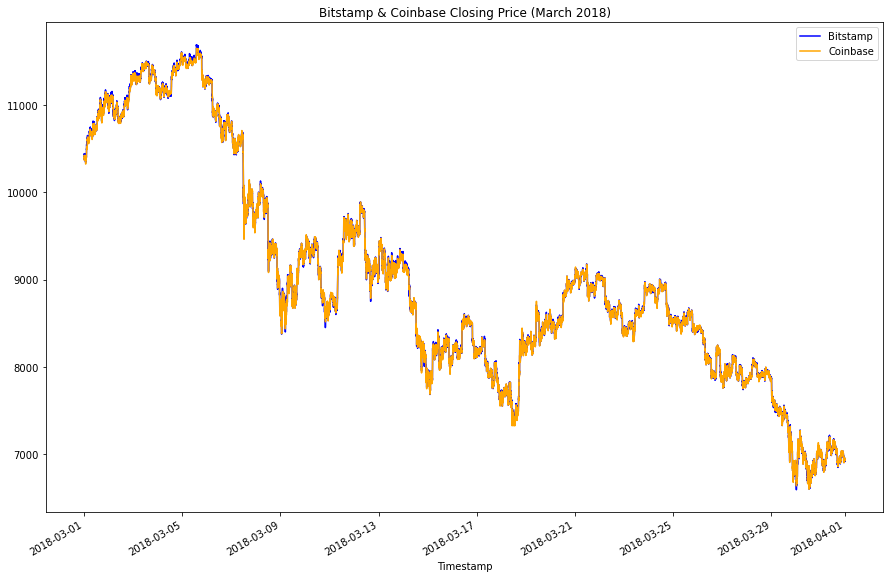

In [31]:
# Breaking down the month of March closing prices for bitstamp and coinbase
bitstamp['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (March 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The spread between closing prices appears to be greatest during the last week of January, and is certainly getting less during the months of March

### Focsuing on specific dates

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (28 Jan 2018)'}, xlabel='Timestamp'>

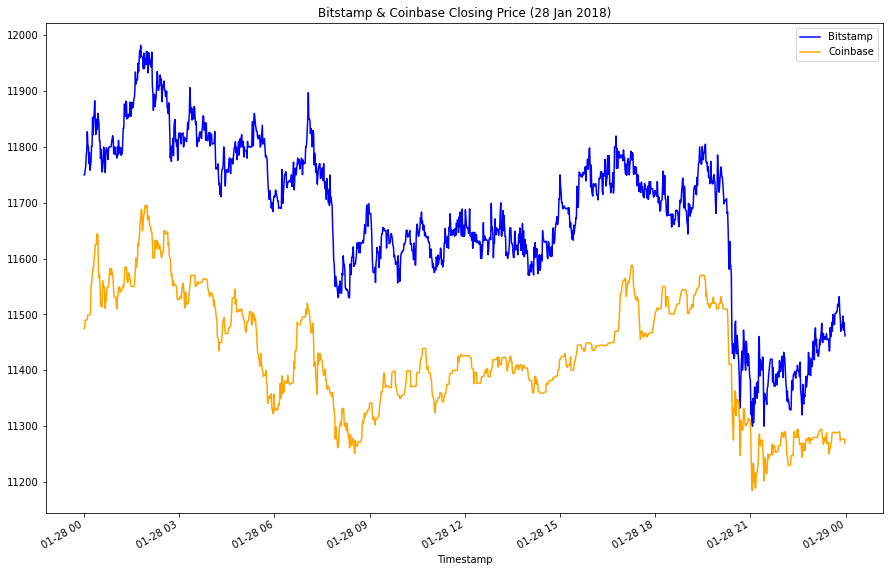

In [32]:
#Overlay plot for 28 January 2018
#Note the significant delta in closing price throughout the day
bitstamp['Close'].loc['2018-01-28' : '2018-01-28'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (28 Jan 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-01-28' : '2018-01-28'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

In [33]:
# Calculating arbitrage spread & generating summary statistics for 28 Jan
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28'] 

arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:>

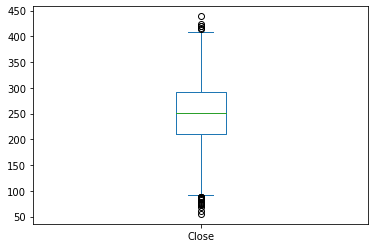

In [34]:
# Create box plot
arbitrage_spread_early.plot.box()

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (6 Feb 2018)'}, xlabel='Timestamp'>

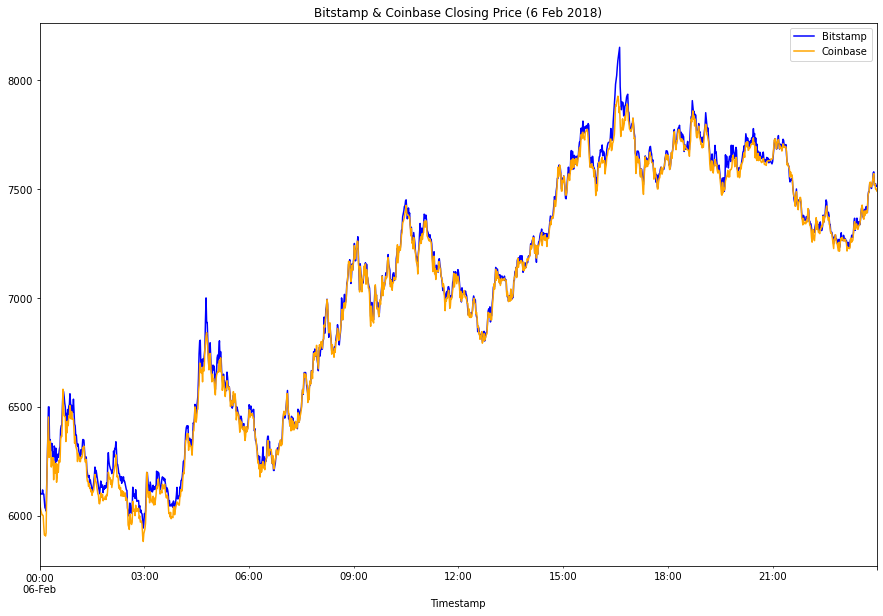

In [35]:
# Overlay plot for 6 February 2018 
bitstamp['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (6 Feb 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

In [36]:
# Caclulate arbitrage spread
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-06'] - coinbase['Close'].loc['2018-02-06'] 

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:>

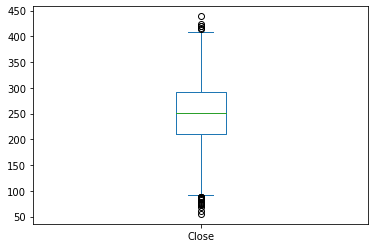

In [37]:
# create box plot
arbitrage_spread_early.plot.box()

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (20 Mar 2018)'}, xlabel='Timestamp'>

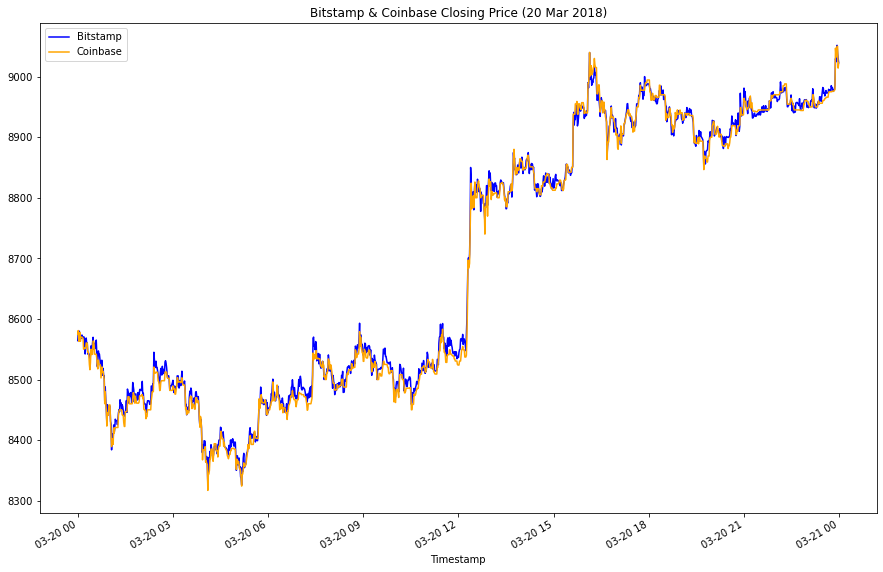

In [38]:
# Overlay plot for 20 March 2018 
bitstamp['Close'].loc['2018-03-20' : '2018-03-20'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (20 Mar 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-03-20' : '2018-03-20'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

In [39]:
# Calculate arbitrage for data
arbitrage_spread_late =  coinbase['Close'].loc['2018-03-20'] - bitstamp['Close'].loc['2018-03-20']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean       -4.572556
std         9.269393
min       -59.950000
25%       -10.962500
50%        -4.825000
75%         1.477500
max        27.930000
Name: Close, dtype: float64

<AxesSubplot:>

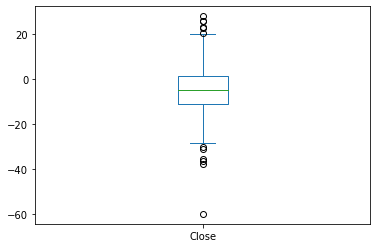

In [40]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box()

### Calculate the Arbitrage Profits

#### Subtract coinbase data from bitstamp data to determine arbitrage spread.  Generate summary statistics


In [41]:
# 28 January Arbitrage spread
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

# statitical analysis for postive arbitrage spreads
arbitrage_spread_early[arbitrage_spread_early>0].describe()
    

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [42]:
# same as above summary for 6 Feb
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-06'] - coinbase['Close'].loc['2018-02-06']
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    1177.000000
mean       31.294452
std        28.481383
min         0.010000
25%        13.000000
50%        24.530000
75%        42.540000
max       280.010000
Name: Close, dtype: float64

In [43]:
# same as above for 20 March
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-20'] - coinbase['Close'].loc['2018-03-20'] 
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    980.000000
mean       9.290367
std        6.611229
min        0.010000
25%        4.240000
50%        8.440000
75%       13.165000
max       59.950000
Name: Close, dtype: float64

#### determine percentage gains for each positive arbitrage opportunity

In [44]:
# Calculating returns for 28 Jan.
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/bitstamp['Close'].loc['2018-01-28']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
                         ...   
2018-01-28 23:55:00    0.019144
2018-01-28 23:56:00    0.017007
2018-01-28 23:57:00    0.018174
2018-01-28 23:58:00    0.017008
2018-01-28 23:59:00    0.016807
Name: Close, Length: 1436, dtype: float64

In [45]:
#calculating the spread returns for 6 Feb 2018
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]/bitstamp['Close'].loc['2018-02-06']
spread_return_middle

Timestamp
2018-02-06 00:00:00    0.009983
2018-02-06 00:01:00    0.009852
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
                         ...   
2018-02-06 23:55:00         NaN
2018-02-06 23:56:00         NaN
2018-02-06 23:57:00    0.003260
2018-02-06 23:58:00    0.001534
2018-02-06 23:59:00    0.003147
Name: Close, Length: 1440, dtype: float64

In [46]:
#Calculating the spread returns for 20 March 2018
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0]/bitstamp['Close'].loc['2018.03.20']
spread_return_late

Timestamp
2018-03-20 00:00:00         NaN
2018-03-20 00:01:00         NaN
2018-03-20 00:02:00    0.001399
2018-03-20 00:03:00    0.001956
2018-03-20 00:04:00         NaN
                         ...   
2018-03-20 23:55:00    0.001232
2018-03-20 23:56:00    0.000184
2018-03-20 23:57:00         NaN
2018-03-20 23:58:00    0.001854
2018-03-20 23:59:00    0.000092
Name: Close, Length: 1432, dtype: float64

#### 3. Identify trades that will still be net positive, even with having to pay a 1% transaction fee

In [47]:
# Filtering the 28 Jan data for trades that exceed the minimum threshold of 1%
profitable_trades_early = spread_return_early[spread_return_early>.01]
# Review the first five profitable trades
profitable_trades_early

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
                         ...   
2018-01-28 23:55:00    0.019144
2018-01-28 23:56:00    0.017007
2018-01-28 23:57:00    0.018174
2018-01-28 23:58:00    0.017008
2018-01-28 23:59:00    0.016807
Name: Close, Length: 1377, dtype: float64

In [48]:
# filtering the 6 Feb data for trades that exceed minimum threshold of 1%
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]
profitable_trades_middle

Timestamp
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
2018-02-06 00:05:00    0.018794
2018-02-06 00:06:00    0.016411
                         ...   
2018-02-06 17:05:00    0.010585
2018-02-06 19:39:00    0.015566
2018-02-06 19:41:00    0.012093
2018-02-06 19:46:00    0.012391
2018-02-06 19:49:00    0.014356
Name: Close, Length: 109, dtype: float64

In [49]:
# Filtering the 20 March data for trades that exceed the minimum threshold of 1%

profitable_trades_late = spread_return_late[spread_return_late>.01]
profitable_trades_late

Series([], Name: Close, dtype: float64)

In [50]:
# note:  There were no arbitrage opportunites that met the 1% threshold

#### Determine statistical summary for trades that meet 1% threshold

In [51]:
#summary statistics for profitable trades on 28 Jan 2018
profitable_trades_early.describe()

count    1377.000000
mean        0.021700
std         0.005179
min         0.010006
25%         0.018666
50%         0.021711
75%         0.024784
max         0.037082
Name: Close, dtype: float64

In [52]:
#summary statistics for profitable trades on 6 Feb 2018
profitable_trades_middle.describe()

count    109.000000
mean       0.014122
std        0.005092
min        0.010002
25%        0.010811
50%        0.012063
75%        0.015566
max        0.035665
Name: Close, dtype: float64

In [53]:
# Summary statistics for profitable trades on 20 March 2018
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### Determine profit per trade

In [54]:
#potential profit per trade on 28 Jan 2018 that meets threshold criteria of 1%
profit_early = profitable_trades_early*bitstamp['Close'].loc['2018-01-28']

profit_per_trade_early = profit_early.dropna()


profit_per_trade_early

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1377, dtype: float64

In [55]:
#potential profit per trade on  6Feb 2018 that meets threshold criteria of 1%
profit_middle = profitable_trades_middle*bitstamp['Close'].loc['2018-02-06']
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

Timestamp
2018-02-06 00:02:00     75.95
2018-02-06 00:03:00     84.99
2018-02-06 00:04:00     96.09
2018-02-06 00:05:00    115.00
2018-02-06 00:06:00    100.11
                        ...  
2018-02-06 17:05:00     81.00
2018-02-06 19:39:00    119.18
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
Name: Close, Length: 109, dtype: float64

In [56]:
# Potential profit per trade on 20 March 2018 that meet threshold criteria of 1%
profit_late = profitable_trades_late*bitstamp['Close'].loc['2018-03-29']
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### Summarize and plot results

In [57]:
#Summary statistics for profitable trades on 28 Jan 2018
profit_per_trade_early.describe()

count    1377.000000
mean      254.033275
std        61.966468
min       113.970000
25%       217.400000
50%       254.190000
75%       292.990000
max       439.010000
Name: Close, dtype: float64

In [58]:
#Summary statistics for profitable trades on 6 Feb 2018
profit_per_trade_middle.describe()

count    109.000000
mean      95.182202
std       41.231214
min       61.690000
25%       68.220000
50%       80.330000
75%      106.970000
max      280.010000
Name: Close, dtype: float64

In [59]:
# Summary statistics for profitable trades on 20 Mar 2018
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

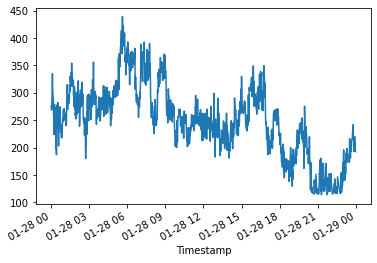

In [60]:
#Plotted Results for profitable trades on 28 Jan 2018
profit_per_trade_early.plot()

<AxesSubplot:xlabel='Timestamp'>

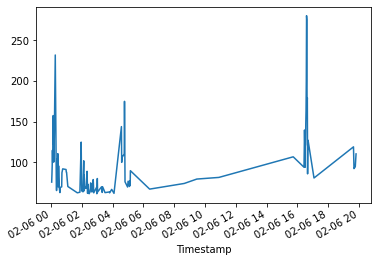

In [61]:
#Plotted Results for profitable trades on 6 Feb 2018
profit_per_trade_middle.plot()

<AxesSubplot:xlabel='Timestamp'>

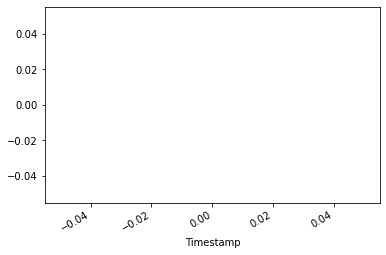

In [62]:
# Plotted Results for trades on 20 Mar 2018
profit_per_trade_late.plot()

#### Calculating potential profits

In [63]:
#Total value of potential trades on 28 2018
print(f"The potential profit for 28 January is ${profit_per_trade_early.sum(): .2f}")

The potential profit for 28 January is $ 349803.82


In [64]:
#Total value of potential trades on 6 Feb 2018
print(f"The potential profit for 6 February is ${profit_per_trade_middle.sum(): .2f}")

The potential profit for 6 February is $ 10374.86


In [65]:
#Total Value of potential trades on 29 Mar 2018
print(f"The potential profit for 20 March is ${profit_per_trade_late.sum(): .2f} as there are no arbitrage opportunities that meet the 1% threshold")

The potential profit for 20 March is $ 0.00 as there are no arbitrage opportunities that meet the 1% threshold


#### Plot cumulative profits for each day

In [66]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits 28 January 2018'}, xlabel='Timestamp'>

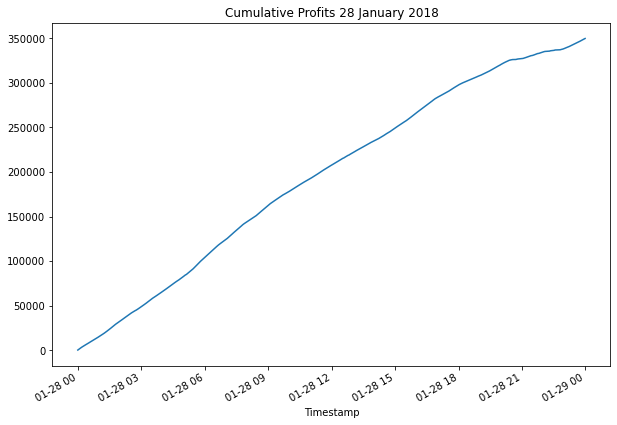

In [67]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,7), title="Cumulative Profits 28 January 2018")

<AxesSubplot:title={'center':'Cumulative Profits 6 February 2018'}, xlabel='Timestamp'>

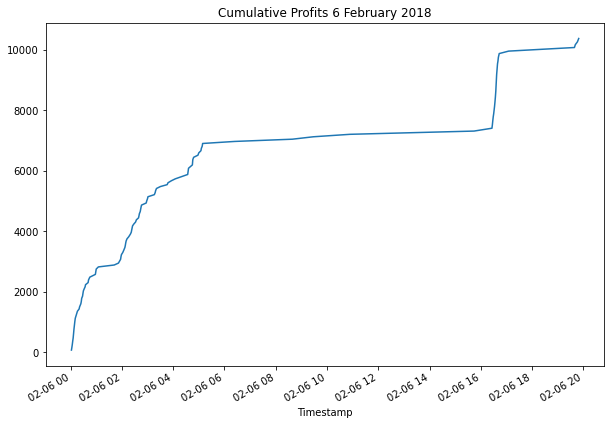

In [68]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot(figsize=(10,7), title="Cumulative Profits 6 February 2018")

<AxesSubplot:title={'center':'Cumulative Profits 20 March 2018'}, xlabel='Timestamp'>

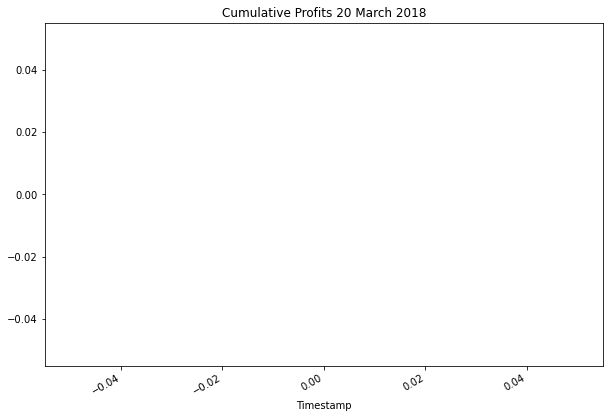

In [69]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.plot(figsize=(10,7), title="Cumulative Profits 20 March 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** In January we saw strong arbitrage opportunities, especially early in the month, and over time we saw the opportunities decrease with February presenting less opportunities, and I have been unable to find any ooportunities in March.  This tells me that the market is correcting the innefficies we were able to identify in January and February, and if we are going to cotinue to make profit via arbitrage we will need to find a service that charges less than 1% per transaction.